In [1]:
# importing Liabraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Importing and reading dataset 

data = pd.read_csv("creditcard.csv")
pd.options.display.max_columns = None
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
print(data.shape)
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

(284807, 31)
Number of columns: 31
Number of rows: 284807


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Standard scaling and converting large values into small

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [7]:
# removing Unwanted columns

data = data.drop(['Time'], axis =1)

In [8]:
# Remove duplicates

data.duplicated().any()

True

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(275663, 30)

In [11]:
# Cheaking either Data is Imbalanced or not

data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

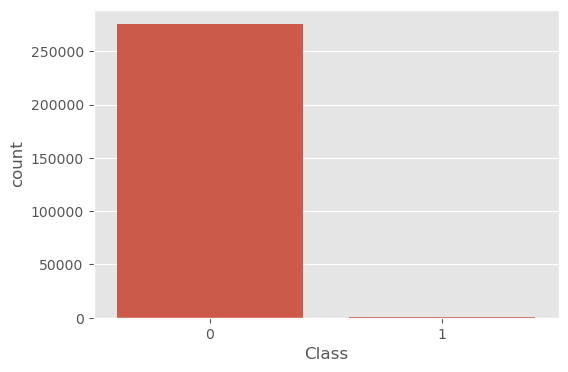

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.show()

In [30]:
# splitting dataset as Independent(X) and dependent(y) variables

X = data.drop('Class', axis = 1)
y=data['Class']

In [32]:
# Divide data into training and testing 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
# Model fitting

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [37]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9992563437505668

 Precision: 0.890625

 Recall: 0.6263736263736264

 F1 Score: 0.7354838709677419

==========Decision Tree Classifier===========

 Accuaracy: 0.9990024123483213

 Precision: 0.6764705882352942

 Recall: 0.7582417582417582

 F1 Score: 0.7150259067357513


# Undersampling

In [40]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [42]:
normal.shape

(275190, 30)

In [44]:
fraud.shape

(473, 30)

In [46]:
normal_sample = normal.sample(n=473)

In [48]:
normal_sample.shape

(473, 30)

In [50]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [52]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [54]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9421052631578948

 Precision: 0.9789473684210527

 Recall: 0.9117647058823529

 F1 Score: 0.9441624365482234

==========Decision Tree Classifier===========

 Accuaracy: 0.9210526315789473

 Precision: 0.9306930693069307

 Recall: 0.9215686274509803

 F1 Score: 0.9261083743842364


# OVERSAMPLING

In [61]:
X = data.drop('Class', axis = 1)
y= data['Class']

In [63]:
X.shape

(275663, 29)

In [65]:
y.shape

(275663,)

In [67]:
from imblearn.over_sampling import SMOTE

In [69]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [71]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [76]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9443202878011555

 Precision: 0.9731817829757571

 Recall: 0.9137501590822319

 F1 Score: 0.9425300289740921

==========Decision Tree Classifier===========

 Accuaracy: 0.9983102583669464

 Precision: 0.9976938860743404

 Recall: 0.998927331236478

 F1 Score: 0.9983102276650253


In [78]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)

DecisionTreeClassifier()

In [80]:
import joblib

In [82]:
joblib.dump(dtc, "credit_card_model.pkl")

['credit_card_model.pkl']

In [84]:
model = joblib.load("credit_card_model.pkl")

In [86]:
pred = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [88]:
pred[0]

0

In [90]:
if pred[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation
